# A Simulated Dataset of a Real-World Phenomenom

## Introduction

The real-world phenomenom that I will be looking at is the relationship between obesity and increased mortaility. Obesity grades 2 and 3 (BMI >/= 35) is associated with an aproximate 30% increase in all-cause mortality https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/. 

This dataset can be used to predict the number of people in a population that will suffer from obesity and therefore an increase in all-cause mortality.

(include underweight as well - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/)

(Define all-cause mortality)


## Investigation
Variables to look at:
Sex (What is the proportion of males to females?)
Weight (Average weight by sex and the standard deviation)
Height (Average height and standard deviation)
BMI 
BMI Category 
Risk of all-cause mortality

For sex, there are different average weights and heights for males and females.



(What kind of variables are being used - discrete, continuous, categorical etc - https://www.statisticshowto.datasciencecentral.com/types-variables/)

We'll start by importing some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Age

In [2]:
adults15to24 = 301114 + 292055
adults25to54 = 1087587 + 1077383 
adults55to64 = 261650 + 260737

adults18to24 = int(adults15to24 * 0.7)

totalAdults18to64 = adults18to24 + adults25to54 + adults55to64 

totalAdults18to64

3102575

In [3]:
proportion18to24 = adults18to24/totalAdults18to64
proportion25to54 = adults25to54/totalAdults18to64
proportion55to64 = adults55to64/totalAdults18to64

print(f"Proportion of adults aged 15 to 24: {proportion18to24}")
print(f"Proportion of adults aged 25 to 54: {proportion25to54}")
print(f"Proportion of adults aged 55 to 64: {proportion55to64}")

Proportion of adults aged 15 to 24: 0.13383012497683375
Proportion of adults aged 25 to 54: 0.6977977969912089
Proportion of adults aged 55 to 64: 0.16837207803195733


### Sex ratio

The ratio of males to females in Ireland are:
Aged 15 to 24: 301,114 males and 292,055 females (1.03 m/f)
Aged 25 to 54: 1,087,587 males and 1,077,383 females (1.01 m/f)
Aged 55 to 64: 261,650 males and 260,737 females (1 m/f)

(Reference - https://www.indexmundi.com/ireland/demographics_profile.html)

In [4]:
# Number of males and females in Ireland aged 15 to 64 years old
males = 301114 + 1087587 + 261650
females = 292055 + 1077383 + 260737

# Total number of adults in Ireland aged 15 to 64 years old
total = males + females

print(f"The number of males aged 15 to 64 in Ireland is {males}")
print(f"The number of females aged 15 to 64 in Ireland is {females}")
print(f"The total number of males and females aged 15 to 64 in Ireland is {total}")
      

The number of males aged 15 to 64 in Ireland is 1650351
The number of females aged 15 to 64 in Ireland is 1630175
The total number of males and females aged 15 to 64 in Ireland is 3280526


In [5]:
# Ratio of males to females in Ireland aged 15 to 64

ratioOfMales = males/ total
ratioOfFemales = females/ total

print(ratioOfMales)
print(ratioOfFemales)

0.5030751166123969
0.4969248833876031


The figures below for weight and height are for 18 to 64 year olds. Here an assumption will be made that the ratio for males to females in Ireland aged 18 to 64 year olds will be the same as 15 to 64 year olds. However, as can be seen from the ratios above, the number of males to females decreases as age increases (1.03 for 15 to 24 year olds, 1.01 for 25 to 54 and 1.00 55 to 64 years).

We can now create a random sample of 1000 people which will have the same ratio of males to females as was found above

In [6]:
# Creating a 1D array with male and female as the elements

sex =["male", "female"]

sampleSize = 2000

sexArray = np.random.choice(sex, sampleSize, p=[ratioOfMales, ratioOfFemales])

unique, count = np.unique(sexArray, return_counts=True)

femaleCount, maleCount = count[0], count[1]

print(f"The unique elements in the array are: {unique}")
print(f"There are {femaleCount} females and {maleCount} males")

The unique elements in the array are: ['female' 'male']
There are 991 females and 1009 males


### Weight

Mean adult (18 to 64 years old) male body weight is 86.2 kg with a standard deviation of 15.0 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

Mean adult (18 to 64 years old) female bodyweight is 70.0 kg with a standard deviation of 13.7 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [7]:
# Assigning variables for weight

meanMaleWeight, maleWeightSD = 86.2, 15.0
meanFemaleWeight, femaleWeightSD = 70.0, 13.7

The median values for males and females are 85.1 kg and 67.5 kg respectively. The distributions for weight for males and females are therefore are both positively skewed. We can also see this by examining the 5th and 95th percentiles. For males these are 64.0 kg and 112.6 kg, respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). For females, these are 52.2 kg and 96.3 kg respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). 

The differences between these and their respective medians can be calculated as follows:

In [8]:
# Assigning median, 5th perentile and 95th percentiles

maleMedian, male5th, male95th = 85.1, 64.0, 112.6
femaleMedian, female5th, female95th = 67.5, 52.2, 96.3

# Calculating difference between medians and 5th and 95th percentiles
male5thdiff = maleMedian - male5th
male95thdiff = male95th - maleMedian

female5thdiff = femaleMedian - female5th
female95thdiff = female95th - femaleMedian

print(f"The difference between the median body weight for males and the 5th and 95th percentiles are:")
print(f"5th percentile: {male5thdiff}")
print(f"95th percentile: {male95thdiff}")

print(f"The difference between the median body weight for females and the 5th and 95th percentiles are:")
print(f"5th percentile: {female5thdiff}")
print(f"95th percentile: {female95thdiff}")

The difference between the median body weight for males and the 5th and 95th percentiles are:
5th percentile: 21.099999999999994
95th percentile: 27.5
The difference between the median body weight for females and the 5th and 95th percentiles are:
5th percentile: 15.299999999999997
95th percentile: 28.799999999999997


This also shows that body weight is not normally distributed but is instead positively skewed.

A study of German, Norwegian and Austrian conscripts also found that body weight is not normally distributed. 

(Reference - https://www.ncbi.nlm.nih.gov/pubmed/11673780)

There may be a diproportionately larger number of obese people than underweight (therefore leading to the positive skewness) due to the fact that the more a person weighs the easier it then is for them to gain even more weight. (Reference - https://www.researchgate.net/publication/7006581_The_Changing_Shape_of_the_Body_Mass_Index_Distribution_Curve_in_the_Population_Implications_for_Public_Health_Policy_to_Reduce_the_Prevalence_of_Adult_Obesity)

Firstly we will create a normal distribution for male and female weights

(array([   1.,    9.,   29.,   91.,  203.,  263.,  216.,  130.,   40.,    9.]),
 array([  17.27807691,   26.56138008,   35.84468325,   45.12798643,
          54.4112896 ,   63.69459278,   72.97789595,   82.26119912,
          91.5445023 ,  100.82780547,  110.11110864]),
 <a list of 10 Patch objects>)

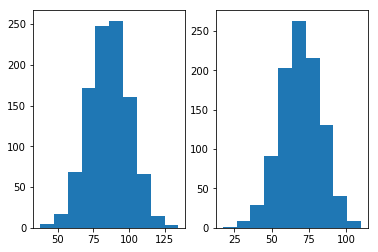

In [9]:
# Creating a random Normally distributed array for male and female weight
# The size of the distribution for each sex is equal to the count of males or females from the sexArray above
maleWeightDist = np.random.normal(meanMaleWeight, maleWeightSD, maleCount)
femaleWeightDist = np.random.normal(meanFemaleWeight, femaleWeightSD, femaleCount)


# Displaying the male and female weights on a histogram
plt.subplot(121)
plt.hist(maleWeightDist)

plt.subplot(122)
plt.hist(femaleWeightDist)

From above in the https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf it was found that the male 5th and 95th percentiles were 64.0 and 112.6 respectively. We can view what these values are for the normally distributed male weight distribution:

In [10]:
# Assigning the 5th percentile for normally distributed male and female weight
male5thNormal = np.percentile(maleWeightDist, 5)
female5thNormal = np.percentile(femaleWeightDist, 5)

# Assigning the 95th percentile for normally distributed male and female weight
male95thNormal = np.percentile(maleWeightDist, 95)
female95thNormal = np.percentile(femaleWeightDist, 95)

# Printing the 5th and 95th percentiles for normally distributed male and female weight
print(f"The 5th percentile for normally distributed male weight is: {male5thNormal} (difference from real value is: {male5th-male5thNormal})")
print(f"The 95th percentile for normally distributed male weight is: {male95thNormal} (difference from real value is: {male95th-male95thNormal})")

print(f"The 5th percentile for normally distributed female weight is: {female5thNormal} (difference from real value is: {female5th-female5thNormal})")
print(f"The 95th percentile for normally distributed female weight is: {female95thNormal} (difference from real value is: {female95th-female95thNormal})")

The 5th percentile for normally distributed male weight is: 62.00751515235039 (difference from real value is: 1.9924848476496066)
The 95th percentile for normally distributed male weight is: 109.21642945429909 (difference from real value is: 3.3835705457009055)
The 5th percentile for normally distributed female weight is: 46.89561762079839 (difference from real value is: 5.304382379201613)
The 95th percentile for normally distributed female weight is: 91.45601888699204 (difference from real value is: 4.843981113007956)


As would be expected, the results are lower than the positively skewed real values. Also the female values are more skewed than the male values.

We can create a positively skewed distribution using the following code:

In [11]:
# Importing the skewnorm function from scipy.stats 
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm 
from scipy.stats import skewnorm


# Creating a skewed normal distribution for male weight with a skewness factor of 0.1
# The size of the distribution for males is equal to the count of males from the sexArray above
maleWeightSkewedDist = skewnorm.rvs(0.1, loc=meanMaleWeight, scale=maleWeightSD, size=maleCount)

# Creating a skewed normal distribution for female weight with a skewness factor of 0.4
# The size of the distribution for females is equal to the count of females from the sexArray above
femaleWeightSkewedDist = skewnorm.rvs(0.4, loc=meanFemaleWeight, scale=femaleWeightSD, size=femaleCount)

# Assigning the 5th percentile for the skewed normal weight distribution for males and females
male5thSkewed = np.percentile(maleWeightSkewedDist, 5)
female5thSkewed = np.percentile(femaleWeightSkewedDist, 5)

# Assigning the 95th percentile for the skewed normal weight distribution for male and females
male95thSkewed = np.percentile(maleWeightSkewedDist, 95)
female95thSkewed = np.percentile(femaleWeightSkewedDist, 95)


print(f"The 5th percentile for the skewed normal distribution for males is: {male5thSkewed} (real is: {male5th})")
print(f"The 95th percentile for the skewed normal distribution for males is: {male95thSkewed} (real is: {male95th})")

print(f"The 5th percentile for the skewed normal distribution for females is: {female5thSkewed} (real is: {female5th})")
print(f"The 95th percentile for the skewed normal distribution for females is: {female95thSkewed} (real is: {female95th})")

The 5th percentile for the skewed normal distribution for males is: 63.929966641378854 (real is: 64.0)
The 95th percentile for the skewed normal distribution for males is: 111.42067855005536 (real is: 112.6)
The 5th percentile for the skewed normal distribution for females is: 53.41246711274209 (real is: 52.2)
The 95th percentile for the skewed normal distribution for females is: 95.57126816849427 (real is: 96.3)


(array([  10.,   29.,   98.,  192.,  219.,  202.,  145.,   62.,   25.,    9.]),
 array([  37.36242935,   44.89997843,   52.4375275 ,   59.97507658,
          67.51262565,   75.05017473,   82.5877238 ,   90.12527288,
          97.66282195,  105.20037103,  112.7379201 ]),
 <a list of 10 Patch objects>)

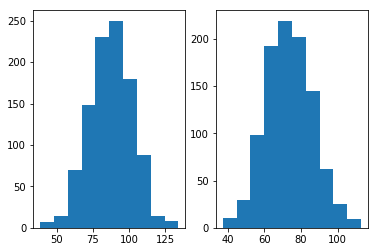

In [12]:
# Plotting the skewed normal male and female weight distributions

plt.subplot(121)
plt.hist(maleWeightSkewedDist)

plt.subplot(122)
plt.hist(femaleWeightSkewedDist)

### Height

Human height is normally distributed (Ref - https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/). The reason for this is that there are many genetic and envirnomental factors that are involved in height which leads to the large variation (Ref https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/).

Mean adult (18 to 64 years old) male height is 1.77 m with a standard deviation of 0.07 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)
Mean adult (18 to 64 years old) female height is 1.63 m with a standard deviation of 0.06 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [13]:
# Setting height variables
maleHeight, femaleHeight = 1.77, 1.63
maleHeightSD, femaleHeightSD = 0.07, 0.06

(array([   6.,   35.,   95.,  165.,  236.,  244.,  130.,   62.,   13.,    5.]),
 array([ 1.45385396,  1.4903686 ,  1.52688324,  1.56339787,  1.59991251,
         1.63642715,  1.67294179,  1.70945643,  1.74597106,  1.7824857 ,
         1.81900034]),
 <a list of 10 Patch objects>)

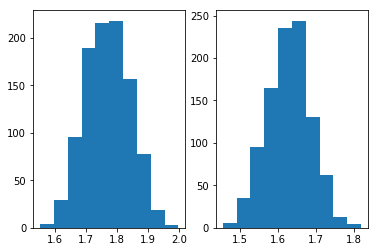

In [14]:
# Creating height distributions
# The size of the distribution for males and females is equal to the count of males or females from the sexArray above
maleHeightDist = np.random.normal(maleHeight, maleHeightSD, maleCount)
femaleHeightDist = np.random.normal(femaleHeight, femaleHeightSD, femaleCount)

# Plotting distributions on a histogram
plt.subplot(121)
plt.hist(maleHeightDist)

plt.subplot(122)
plt.hist(femaleHeightDist)

### BMI

BMI is calculated using the following formula weight(kg)/height(m)^2 (Ref - https://journals.lww.com/nutritiontodayonline/Fulltext/2015/05000/Body_Mass_Index__Obesity,_BMI,_and_Health_A.5.aspx) (Expand on this - Why is height squared ??????)

(include limitations of BMI - https://en.wikipedia.org/wiki/Body_mass_index)



In [15]:
# Creating BMI variable for males from weight and height distributions
maleBMI = maleWeightSkewedDist/maleHeightDist**2

# Creating BMI variable for females from weight and height distributions
femaleBMI = femaleWeightSkewedDist/femaleHeightDist**2

### BMI Categories

There are 11 different BMI categories ( Ref - https://en.wikipedia.org/wiki/Body_mass_index.)

For this data set we will only look at 6:
* Underweight (BMI of <18.5)
* Normal (BMI of 18.5-<25.0)
* Overweight (BMI of 25.0-<30.0)
* Obese 1 (BMI of 30.0-<35.0)
* Obese 2 (BMI of 35.0-<40.0)
* Obese 3 (BMI of >/=40.0)

In [16]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

df = pd.DataFrame({'BMI': maleBMI})

BMICategories = ["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"]

BMIArray = pd.cut(df.BMI, [0.0, 18.5, 25.0, 30.0, 35.0, 40.0, 1000.0], labels=BMICategories, retbins=True, right=False)

BMIArray

(0        Overweight
 1        Overweight
 2           Obese 1
 3        Overweight
 4           Obese 1
 5        Overweight
 6            Normal
 7        Overweight
 8           Obese 1
 9            Normal
 10           Normal
 11          Obese 1
 12           Normal
 13          Obese 1
 14          Obese 2
 15       Overweight
 16          Obese 1
 17           Normal
 18           Normal
 19       Overweight
 20       Overweight
 21          Obese 1
 22          Obese 1
 23       Overweight
 24           Normal
 25       Overweight
 26       Overweight
 27       Overweight
 28       Overweight
 29       Overweight
            ...     
 979      Overweight
 980         Obese 1
 981      Overweight
 982          Normal
 983         Obese 1
 984      Overweight
 985      Overweight
 986         Obese 1
 987     Underweight
 988         Obese 1
 989      Overweight
 990          Normal
 991         Obese 2
 992      Overweight
 993          Normal
 994         Obese 2
 995         

In [17]:
maleBMI

array([ 29.78739675,  27.62410122,  34.624596  , ...,  26.73119006,
        27.42462666,  27.94383153])

### All-Cause Mortality Hazard Ratios

The hazard ratios for all-cause mortality have been studied for people who are overweight, obese and underweight. The hazard ratio for these weight categories are relative to normal weight (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/ and https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/). The hazard ratios are as follows:
Underweight = 1.37 (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/)
Normal = 1 (hazard ratios are relative to normal so this will have a HR of 1)
Overweight = 0.94 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)
Obese 1 = 0.95 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)
Obese 2 and above = 1.29 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)

For Obese 1 the value is below 1, therefore it might be assumed that this represents a reduction in all-cause mortality. However, this value is within the margin of error (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/).

Surprisingly, being overweight was found to be significantly associated with a lower risk of all cause mortality relative to normal weight. (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)

In [18]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

HRCategories = [1.37, 1, 0.94, 0.95, 1.29]

HRArray = pd.cut(maleBMI, [0.0, 18.5, 25.0, 30.0, 35.0, 1000.0], labels=HRCategories, retbins=True, right=False)

HRArray

([0.94, 0.94, 0.95, 0.94, 0.95, ..., 1.00, 0.95, 0.94, 0.94, 0.94]
 Length: 1009
 Categories (5, float64): [1.37 < 1.00 < 0.94 < 0.95 < 1.29],
 array([    0. ,    18.5,    25. ,    30. ,    35. ,  1000. ]))

## Simulating the Dataset

Finally we will simulate the entire dataset adding each array created above.

### Sex

In [19]:
# Creating the DataFrame and adding the Sex column with data from the sexArray

simdf = pd.DataFrame({"Sex": sexArray})

simdf.head(10)

,Sex
0,male
1,male
2,female
3,female
4,female
5,female
6,male
7,male
8,female
9,male


### Weight

In [41]:
# Adapted from https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column
# and https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column

# Creating a male subset
maledf = simdf.loc[simdf['Sex'] == 'male']

# Creating a female subset
femaledf = simdf.loc[simdf['Sex'] == 'female']

# Creating an index from the male subset
maleRowIndex = maledf.index

# Creating an index from the female subset
femaleRowIndex = femaledf.index


# Adding male wieghts to male rows
simdf['Weight'].loc[simdf['Sex'] == 'male'] = pd.Series(maleWeightSkewedDist, index=maleRowIndex)

# Adding female wieghts to male rows
simdf['Weight'].loc[simdf['Sex'] == 'female'] = pd.Series(femaleWeightSkewedDist, index=femaleRowIndex)

simdf

,Sex,Weight
0,male,86.317988
1,male,91.507227
2,female,76.159432
3,female,66.385566
4,female,75.015919
5,female,85.584342
6,male,102.178658
7,male,87.523856
8,female,74.237662
9,male,86.003343


## Conclusion

Percentage in ireland with obesity

https://www.safefood.eu/SafeFood/media/SafeFoodLibrary/Documents/Professional/Nutrition/Adult-and-children-obesity-trends-ROI.pdf
